In [1]:
import requests
import pandas
from lxml import html

In [ ]:
# 4 Winning Numbers - Out of 75 balls, 
# Four (04) numbers are sellected from one machine. 
# Bonus Number - One (01) number is sellected out of balance 71 balls from same machine. 
# English Letter - One (01) ball is selected out of 26 alphabets, from a separate 

In [2]:
url = "http://www.dlb.lk/result/pagination_re"

params = {
    "pageId": 1,
    "lotteryID": 1,
    "lastsegment": 1,
    "resultID": 2108
}

In [8]:
data_set = list()
page_index = 1

while True:
    params["pageId"] = page_index
    res = requests.post(url, data = params)
    
    tree = html.fromstring(res.content)
    data_lists = tree.xpath("//ul[@class='res_allnumber']")
    
    results = [l.xpath("./li/node()") for l in data_lists ]
    
    if len(results) == 0:
        break
    
    data_set.extend(results)
    
    page_index += 1


In [9]:
columns = ("n1", "n2", "n3", "n4", "bonus", "character")
df = pandas.DataFrame(data_set, columns=columns)

In [10]:
df

,n1,n2,n3,n4,bonus,character
0,06,12,38,58,67,P
1,54,59,60,75,51,G
2,01,24,37,60,28,K
3,24,38,59,74,37,Y
4,03,04,18,73,28,L
5,05,19,54,58,16,R
6,04,47,48,55,19,C
7,10,28,56,74,16,T
8,14,48,52,71,56,B
9,36,50,51,61,05,O


In [18]:
char_count = df.groupby("character")[['character']].count()
char_count

,character
character,
A,2
B,1
C,3
D,1
E,5
F,5
G,4
H,7
I,1


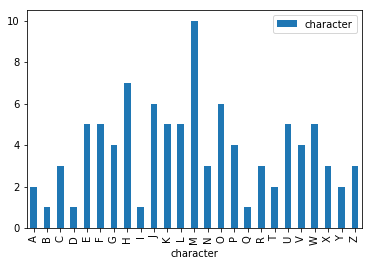

In [19]:
char_count.plot(kind='bar')

In [173]:
n1_count = df.groupby("n1")[['n1']].count()
# n1_count.plot.box()
# n1_count
df.n1.unique()

array(['06', '54', '01', '24', '03', '05', '04', '10', '14', '36', '12',
       '08', '32', '07', '02', '20', '15', '18', '21', '33', '11', '19',
       '09', '49', '37', '22', '27', '34', '47', '17', '25', '16', '13',
       '39', '23', '38', '26', '43'], dtype=object)

In [181]:
n1 = df.sort_values(by=["n1"]).n1.unique()
print(n1)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '32'
 '33' '34' '36' '37' '38' '39' '43' '47' '49' '54']


In [125]:
import matplotlib.pyplot as plt

n1_data = df.groupby(["n1"])['n2'].count()
n1_data = n1_data.reset_index()
n1_data.columns = ['number', 'count']
n1_data
# df_n1 = n1_data.to_frame()
# df_n1.reset_index()
# df_n1.columns = ['count']
# n1_data.plot(kind="scatter", x="n1", y="n2")
# plt.scatter(n1_data.index, n1_data)
# fig = plt.figure(figsize=(800,500))
# fig.set_size_inches(5,3)
# plt.show()

,number,count
0,01,10
1,02,4
2,03,7
3,04,6
4,05,4
5,06,4
6,07,4
7,08,5
8,09,3
9,10,3


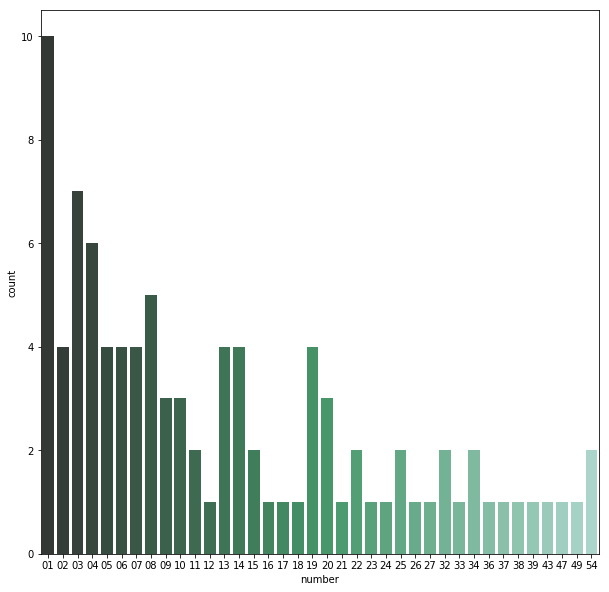

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
# df_n1 = df_n1.reindex(columns=["number", "count"])
# df_n1
# f, ax = plt.subplots(figsize=(20,15))
%matplotlib inline
plt.figure(figsize=(10, 10))
# f, ax = plt.subplots(figsize=(10,10))
# sns.lmplot("number", "count", data=n1_data, fit_reg=False, size=5, aspect=2)
# sns.kdeplot(n1_data["number"], n1_data["count"])
# df_n1
sns.barplot(n1_data["number"], n1_data["count"], palette="BuGn_d")

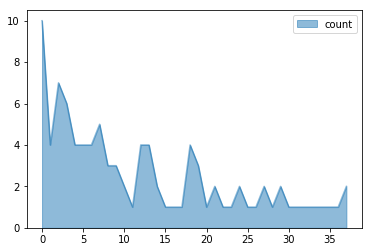

In [166]:
n1_data.plot.area(stacked=False)